# Drawing the multipanel barplot for Q100: EUROPE AR6 land regions

In [1]:
ensembles = c('CORDEX', 'CMIP5', 'CMIP6')
GWLs = c('1.5','2','4')
scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

data = list()
for (ensemble in ensembles){
    data[[ensemble]] = list()
    for (GWL in GWLs){
        data[[ensemble]][[GWL]] = list()
    }
    for (scenario in scenarios){
        data[[ensemble]][[scenario]] = list()
    }

}

## 1. Get the data from the json files

In [2]:
library(rjson)

Warning message:
“package ‘rjson’ was built under R version 3.6.3”


### Prepare R list with all the regions => Get the regions list from the CMIP6 json file, for GWL 1.5K

In [3]:
# -- List of regions for AFRICA
continent_regions = c('NEU','WCE','MED')

regions_by_continent = list(
    EUR = c('NEU','WCE','MED')
    #CAM = c('NCA')
    )


all_regions = list()
GWLs = c('1.5','2','4')
scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

for (region_name in continent_regions){
    all_regions[[region_name]] = list()
    for (ensemble in c('CMIP6','CMIP5','CORDEX')){
        all_regions[[region_name]][[ensemble]] = list()
        for (GWL in GWLs){
            all_regions[[region_name]][[ensemble]][[GWL]] = list()
        }#end for GWL
        for (scenario in scenarios){
            all_regions[[region_name]][[ensemble]][[scenario]] = list()
        }#end for scenario
    }#end for ensemble
}#end for region_name


### Function to read in the data in the txt files provided by ICTP (Fabio Di Sante)

In [4]:
"metrics_reader"=function(metrics_filename){
    
    # -- Read the metrics file provided by Fabio
    lines=readLines(file(metrics_filename,open="r"))
    dat = c()
    for (elt in lines){
        tmp = gsub(' ','', elt)
        dat = c(dat, tmp)
    }#end for elt
    # -- Each region has 4 lines => the number of regions is the length / 4
    nregions = length(dat)/4
    # -- Store the results in res
    res = list()
    for (i in 1:nregions){
        # -- Calculate the index of the region name
        startind = (i-1)*4 + 1
        resname = dat[startind]
        print(resname)
        p10 = as.numeric(dat[startind+1])
        median = as.numeric(dat[startind+2])
        p90 = as.numeric(dat[startind+3])
        print(c(p10,median,p90))
        res[[resname]] = c(p10, median, p90)
    }
    return(res)
}

### Read in CMIP6 data

In [5]:
ensemble = 'CMIP6'

for (continent in names(regions_by_continent)){
    print(paste(continent,'==> '))
    print(regions_by_continent[[continent]])
    
    for (clim_period in c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')){
        if (clim_period=='modern'){ wclim_period='ssp585_1995-2014' }
        if (clim_period=='2.6_mid'){ wclim_period='ssp126_2041-2060' }
        if (clim_period=='2.6_late'){ wclim_period='ssp126_2080-2099' }
        if (clim_period=='8.5_mid'){ wclim_period='ssp585_2041-2060' }
        if (clim_period=='8.5_late'){ wclim_period='ssp585_2080-2099' }
        
        metrics_filename = paste('/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_',ensemble,'/Q100_',wclim_period,'.nc_',continent,'.txt',sep='')
        print(metrics_filename)
        res_metrics_by_AR6region = metrics_reader(metrics_filename)
        for (region_name in names(res_metrics_by_AR6region)){
            all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
        }
    }#end for clim_period

    for (clim_period in c('1.5','2','4')){
        if (clim_period=='1.5'){ wclim_period='1.5' }
        if (clim_period=='2'){ wclim_period='2.0' }
        if (clim_period=='4'){ wclim_period='4.0' }
    
        metrics_filename = paste('/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_',ensemble,'/',wclim_period,'_',continent,'.txt',sep='')
        print(metrics_filename)
        res_metrics_by_AR6region = metrics_reader(metrics_filename)
        for (region_name in names(res_metrics_by_AR6region)){
            all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
        }
    }#end for clim_period
    
    
    
}#end for continent




[1] "EUR ==> "
[1] "NEU" "WCE" "MED"
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CMIP6/Q100_ssp585_1995-2014.nc_EUR.txt"
[1] "NEU"
[1] 0.115787 0.180325 0.333189
[1] "WCE"
[1] 0.0735834 0.1385620 0.1929840
[1] "MED"
[1] 0.0560621 0.1216510 0.1763990
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CMIP6/Q100_ssp126_2041-2060.nc_EUR.txt"
[1] "NEU"
[1] 0.111576 0.171992 0.340257
[1] "WCE"
[1] 0.0775621 0.1278760 0.1811030
[1] "MED"
[1] 0.0563304 0.1388590 0.1837200
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CMIP6/Q100_ssp585_2041-2060.nc_EUR.txt"
[1] "NEU"
[1] 0.0834934 0.1638400 0.2716080
[1] "WCE"
[1] 0.0579611 0.1291570 0.1795260
[1] "MED"
[1] 0.0515655 0.1276410 0.1532100
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CMIP6/Q100_ssp126_2080-2099.nc_EUR.txt"
[1] "NEU"
[1] 0.114893 0.176078 0.373589
[1] "WCE"
[1] 0.0710853 0.1303470 0.1935380
[1] "MED"
[1] 0.0537361 0.1360470 0.1909840
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CMIP

ERROR: Error in res[[resname]] <- c(p10, median, p90): attempt to select less than one element in OneIndex


### Read in CMIP5 data

In [6]:
ensemble = 'CMIP5'

for (continent in names(regions_by_continent)){
    print(paste(continent,'==> '))
    print(regions_by_continent[[continent]])
    
    for (clim_period in c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')){
        if (clim_period=='modern'){ wclim_period='rcp85_1995-2014' }
        if (clim_period=='2.6_mid'){ wclim_period='rcp26_2041-2060' }
        if (clim_period=='2.6_late'){ wclim_period='rcp26_2080-2099' }
        if (clim_period=='8.5_mid'){ wclim_period='rcp85_2041-2060' }
        if (clim_period=='8.5_late'){ wclim_period='rcp85_2080-2099' }
        
        metrics_filename = paste('/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_',ensemble,'/Q100_',wclim_period,'.nc_',continent,'.txt',sep='')
        print(metrics_filename)
        res_metrics_by_AR6region = metrics_reader(metrics_filename)
        for (region_name in names(res_metrics_by_AR6region)){
            all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
        }
    }#end for clim_period

    for (clim_period in c('1.5','2','4')){
        if (clim_period=='1.5'){ wclim_period='1.5' }
        if (clim_period=='2'){ wclim_period='2.0' }
        if (clim_period=='4'){ wclim_period='4.0' }
    
        metrics_filename = paste('/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_',ensemble,'/',wclim_period,'_',continent,'.txt',sep='')
        print(metrics_filename)
        res_metrics_by_AR6region = metrics_reader(metrics_filename)
        for (region_name in names(res_metrics_by_AR6region)){
            all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
        }
    }#end for clim_period
    
}#end for continent

[1] "EUR ==> "
[1] "NEU" "WCE" "MED"
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CMIP5/Q100_rcp85_1995-2014.nc_EUR.txt"
[1] "NEU"
[1] 0.170146 0.314748 0.446963
[1] "WCE"
[1] 0.0999868 0.2358900 0.3698180
[1] "MED"
[1] 0.0609886 0.1026070 0.1844840
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CMIP5/Q100_rcp26_2041-2060.nc_EUR.txt"
[1] "NEU"
[1] 0.161328 0.324317 0.381503
[1] "WCE"
[1] 0.105055 0.248709 0.285923
[1] "MED"
[1] 0.0508124 0.1051270 0.2020660
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CMIP5/Q100_rcp85_2041-2060.nc_EUR.txt"
[1] "NEU"
[1] 0.153362 0.312248 0.437361
[1] "WCE"
[1] 0.109715 0.225702 0.340989
[1] "MED"
[1] 0.0655972 0.1010390 0.1661200
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CMIP5/Q100_rcp26_2080-2099.nc_EUR.txt"
[1] "NEU"
[1] 0.159592 0.340812 0.432891
[1] "WCE"
[1] 0.103492 0.239110 0.279453
[1] "MED"
[1] 0.0563846 0.1000480 0.1637820
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CMIP5/Q100_rcp85_208

### Read in CORDEX data

In [7]:
ensemble = 'CORDEX'
wensemble = paste(ensemble,'-core',sep='')

for (continent in names(regions_by_continent)){
    print(paste(continent,'==> '))
    print(regions_by_continent[[continent]])
    
    for (clim_period in c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')){
        if (clim_period=='modern'){ wclim_period='rcp85_1995-2014' }
        if (clim_period=='2.6_mid'){ wclim_period='rcp26_2041-2060' }
        if (clim_period=='2.6_late'){ wclim_period='rcp26_2080-2099' }
        if (clim_period=='8.5_mid'){ wclim_period='rcp85_2041-2060' }
        if (clim_period=='8.5_late'){ wclim_period='rcp85_2080-2099' }
        
        metrics_filename = paste('/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_',wensemble,'/Q100_',wclim_period,'.nc_',continent,'.txt',sep='')
        print(metrics_filename)
        res_metrics_by_AR6region = metrics_reader(metrics_filename)
        for (region_name in names(res_metrics_by_AR6region)){
            all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
        }
    }#end for clim_period

    for (clim_period in c('1.5','2','4')){
        if (clim_period=='1.5'){ wclim_period='1.5' }
        if (clim_period=='2'){ wclim_period='2.0' }
        if (clim_period=='4'){ wclim_period='4.0' }
    
        metrics_filename = paste('/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_',wensemble,'/',wclim_period,'_',continent,'.txt',sep='')
        print(metrics_filename)
        res_metrics_by_AR6region = metrics_reader(metrics_filename)
        for (region_name in names(res_metrics_by_AR6region)){
            all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
        }
    }#end for clim_period
    
}#end for continent

[1] "EUR ==> "
[1] "NEU" "WCE" "MED"
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CORDEX-core/Q100_rcp85_1995-2014.nc_EUR.txt"
[1] "NEU"
[1] 0.226249 0.483445 0.557356
[1] "WCE"
[1] 0.184365 0.374428 0.455977
[1] "MED"
[1] 0.218720 0.394702 0.577615
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CORDEX-core/Q100_rcp26_2041-2060.nc_EUR.txt"
[1] "NEU"
[1] 0.208701 0.493892 0.515494
[1] "WCE"
[1] 0.168715 0.356910 0.447354
[1] "MED"
[1] 0.239842 0.410061 0.639114
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CORDEX-core/Q100_rcp85_2041-2060.nc_EUR.txt"
[1] "NEU"
[1] 0.205885 0.468750 0.537571
[1] "WCE"
[1] 0.182788 0.378214 0.473330
[1] "MED"
[1] 0.222384 0.385608 0.581219
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CORDEX-core/Q100_rcp26_2080-2099.nc_EUR.txt"
[1] "NEU"
[1] 0.194812 0.479148 0.520329
[1] "WCE"
[1] 0.187629 0.366306 0.446961
[1] "MED"
[1] 0.255642 0.395268 0.618806
[1] "/home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CORDEX-core

## Attribute the colors

In [8]:
for (region_name in continent_regions){
    ensemble = 'CMIP6'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'black'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid4'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'darkorange'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'tan4'

    ensemble = 'CMIP5'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'grey40'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid3'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'sandybrown'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff4'

    ensemble = 'CORDEX'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'grey60'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightpink'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightpink'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'mediumpurple1'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'navajowhite2'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff3'
}#end for region_name

### Function to draw the barplot

In [9]:
"barplot_satellite_chap12"=function(data, title, ylabel, do_ylab='TRUE', do_xlab='TRUE', mar=c(4,3,2.5,1)){
    #
    # -- Names
    ensembles = c('CORDEX','CMIP5','CMIP6')
    GWLs = c('1.5','2','4')
    scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')
    nhorizons = length(GWLs)+length(scenarios)
        
    ylim = c(0,0.6)
    
    # -- position on the x axis of the ensembles
    xpos = c(1,2,3, 4.5, 6, 7, 8, 9)
    xvert = c(1.5,2.5,3.5,5.5,7.5)
    inner_margin = 0.5
    xlim = c(1-inner_margin, max(xpos)+inner_margin)
    general_cex=1.3
    par(cex=general_cex+0.3)
    par(mar=mar)
    plot(1:nhorizons, rep(NA, nhorizons), col='white', ylim=ylim, xlim=xlim,
         xaxt='n', yaxt='n', xlab='', ylab='', xaxs="i", font=2)#
    par(cex=general_cex)
    mtext(ylabel, 2, font=2, line=2.2, cex=general_cex)
    par(xpd=NA)
    par(font=2)
    
    for (yval in seq(0,0.6,by=0.1)){
        lines(xlim,rep(yval,2),type='l', lty=2)
    }

    delta = 0.22 # - space between CMIP6/CMIP5/CORDEX
    # -- Plot data
    i = 1
    for (horizon in c(GWLs, scenarios)){
        j = xpos[i] - delta
        for (ensemble in ensembles){
            print(paste(horizon, ensemble))
            dat = data[[ensemble]][[horizon]][['vals']]
            if (is.null(dat)){dat = c(NA,NA,NA)}
            col = data[[ensemble]][[horizon]][['color']]
            lines(rep(j,2), c(dat[1],dat[3]), type='l', col=col, lwd=4)
            points(j, dat[2], cex=1.5, pch=16, col=col)
            j = j + delta
        }
        i = i + 1
    }
    
    # -- Y axis
    par(cex=2.5)
    yvals = seq(0,0.6,by=0.1)
    ylabels = yvals
    dumyvals = yvals
    if (do_ylab=='TRUE'){
        par(cex=2.6)
        axis(2, at=dumyvals, labels=ylabels, las=1)
        par(cex=general_cex)
    }else{
        axis(2, at=dumyvals, labels=FALSE)#labels=rep(NA,length(dumyvals)))
    }
    par(cex=general_cex)
    
    
    # -- X axis
    if (do_xlab=='FALSE'){
        axis(1, at=xvert, labels=rep('',length(xvert)))
    }
    # -- Title
    mtext(title,3, font=2, cex=3, line=0.5)
    
    # -- Vertical lines    
    vline = ylim
    vline[1] = ylim[1] - (ylim[2]-ylim[1])*0.33
    if (do_xlab=='TRUE'){
        for (v in xvert){lines(c(v,v),vline,type='l', lwd=1)}
    }else{
        for (v in xvert){lines(c(v,v),ylim,type='l')}
    }

    if (do_xlab=='TRUE'){
        cex_text = 1.8
        bline = ylim[1] - 0.42*(ylim[2]-ylim[1])
        #btext2 = ylim[1] - 0.33*(ylim[2]-ylim[1])
        #
        # -- Labels GWLs
        GWLs_range = c(0.5,3.2)
        btext = ylim[1] - 0.54*(ylim[2]-ylim[1])
        lines(c(0.5,3.2), c(bline*0.9,bline*0.9), type='l', lwd=3)
        text(mean(GWLs_range),btext,expression("GWL"), font=1, adj=c(0.5,0), cex=cex_text*0.9)

        btext2 = ylim[1] - 0.23*(ylim[2]-ylim[1])
        adj_ts = c(0.5,0.5)
        adj_gwl = c(0.5,0.5)
        text(1,btext2,"1.5", cex=cex_text, font=1, srt=90, adj=adj_gwl)
        text(2,btext2,"2", cex=cex_text, font=1, srt=90, adj=adj_gwl)
        text(3,btext2,"4", cex=cex_text, font=1, srt=90, adj=adj_gwl)

        # -- Labels time slices = modern, mid-term, long-term
        xmodern = 4.5
        xmid = 6.5
        xlate = 8.5
        text(xmodern,btext2, "r.past", font=1, cex=cex_text, srt=90, adj=adj_ts)
        text(xmid,btext2, "mid.", font=1, cex=cex_text, srt=90, adj=adj_ts)
        text(xlate,btext2, "long.", font=1, cex=cex_text, srt=90, adj=adj_ts)

        time_slices = c(3.6,9.3)
        lines(time_slices, c(bline,bline), type='l', lwd=3)
        text(mean(time_slices),btext,"Time slices", font=1, adj=c(0.5,0), cex=cex_text*0.9)
    }#end if do_ylab

}

In [10]:
region = 'EUROPE'


figname = paste('/home/jservon/Chapter12_IPCC/figs/Figure_12.9/',region,'_Q100_boxplot.png',sep='')
png(figname, width=600,height=700)
mat=rbind(
        c(1,0),
        c(2,3)
    )

layout(mat, heights=c(1,1.25), widths=c(1.2,1))
i = 1
for (subregion in c('NEU','WCE','MED')){
    
    mar = c(1,1,2,0)
    do_ylab='FALSE'
    if (subregion %in% c('NEU','WCE')){
        do_ylab='TRUE'
        mar[2]=4
    }else{
        do_ylab='FALSE'
    }#
    if (subregion %in% c('WCE','MED')){
        do_xlab='TRUE'
        mar[1] = 5 # -- bottom margin
    }else{
        do_xlab='FALSE'
    }#
    
    plot_title = subregion
    ylab = ''
    barplot_satellite_chap12(all_regions[[subregion]],plot_title, ylab, mar=mar, do_xlab=do_xlab, do_ylab=do_ylab)
    #}
    
    i = i + 1
}
dev.off()

[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 

png 
  2

Warning message:
“package ‘IRdisplay’ was built under R version 3.6.3”


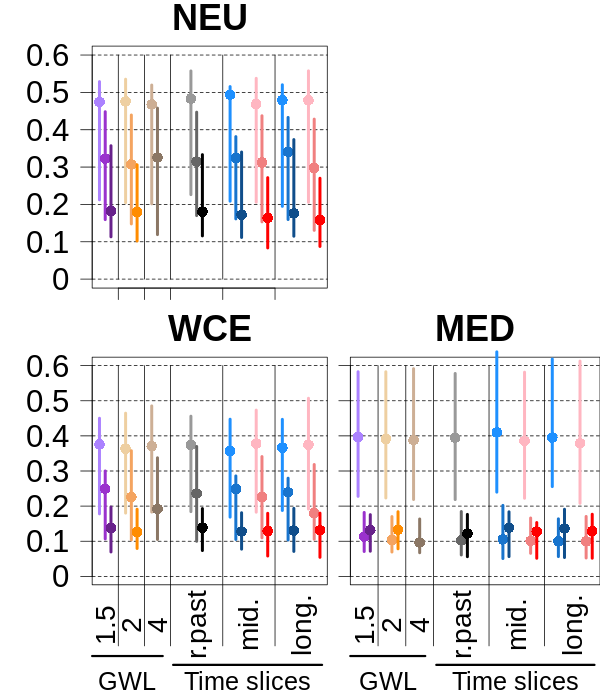

In [11]:
library("IRdisplay")
display_png(file=figname) 